In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from ivstools import tools, constants, colorschemes

In [10]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

sn_color='#71cb69ff'
ap_color='#f9bc0cff'
au_color='#2e3192ff'

In [3]:
df_cdp = pd.read_csv('/home/kurfurst/Documents/datasets/KS_CDP_round6.tsv', names=['count', 'seq'], sep='\t')
df_npp = pd.read_csv('/home/kurfurst/Documents/datasets/MV_apollon_reselection.tsv', names=['count', 'seq'], sep='\t')
df_mup = pd.read_csv('/home/kurfurst/Documents/datasets/MV_aurora_reselection.tsv', names=['count', 'seq'], sep='\t')

In [4]:
#df_cdp['seq'] = [''.join([s[x] for x in constants.supernova_core_positions]) for s in df_cdp['seq']]
#df_npp['seq'] = [''.join([s[x] for x in constants.apollon_core_pos_0]) for s in df_npp['seq']]
#df_mup['seq'] = [''.join([s[x] for x in constants.aurora_core_positions_0]) for s in df_mup['seq']]

In [5]:
dfs = [df_cdp, df_npp, df_mup]

for df in dfs:
    df['dist_from_SN'] = [tools.seqDist(s, constants.supernova_full) for s in df['seq']]
    df['dist_from_AU'] = [tools.seqDist(s, constants.aurora_full) for s in df['seq']]
    df['dist_from_AL'] = [tools.seqDist(s, constants.apollon_full) for s in df['seq']]

In [6]:
vcs_SN = []
vcs_AU = []
vcs_AL = []

for df in dfs:
    vcs_SN.append(df['dist_from_SN'].value_counts(normalize=True).sort_index())
    vcs_AU.append(df['dist_from_AU'].value_counts(normalize=True).sort_index())
    vcs_AL.append(df['dist_from_AL'].value_counts(normalize=True).sort_index())

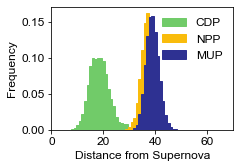

In [26]:
plt.figure(figsize=(3.5, 2.5))
plt.bar(vcs_SN[0].index, vcs_SN[0].values, label='CDP', color=sn_color, width=1, edgecolor=sn_color)
plt.bar(vcs_SN[1].index, vcs_SN[1].values, label='NPP', color=ap_color, width=1, edgecolor=ap_color)
plt.bar(vcs_SN[2].index, vcs_SN[2].values, label='MUP', color=au_color, width=1, edgecolor=au_color)

plt.xlabel('Distance from Supernova')
plt.ylabel('Frequency')
plt.xticks([0, 20, 40, 60])
plt.xlim(0, 70)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('cdp_vs_npp_distance_from_SN.pdf')

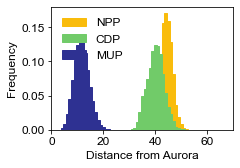

In [27]:
plt.figure(figsize=(3.5, 2.5))
plt.bar(vcs_AU[1].index, vcs_AU[1].values, label='NPP', color=ap_color, width=1, edgecolor=ap_color)
plt.bar(vcs_AU[0].index, vcs_AU[0].values, label='CDP', color=sn_color, width=1, edgecolor=sn_color)
plt.bar(vcs_AU[2].index, vcs_AU[2].values, label='MUP', color=au_color, width=1, edgecolor=au_color)
plt.xlabel('Distance from Aurora')
plt.ylabel('Frequency')
plt.xticks([0, 20, 40, 60])
plt.xlim(0, 70)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('mup_vs_npp_distance_from_AU.pdf')

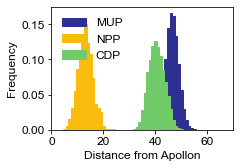

In [28]:
plt.figure(figsize=(3.5, 2.5))

plt.bar(vcs_AL[2].index, vcs_AL[2].values, label='MUP', color=au_color, width=1, edgecolor=au_color)
plt.bar(vcs_AL[1].index, vcs_AL[1].values, label='NPP', color=ap_color, width=1, edgecolor=ap_color)
plt.bar(vcs_AL[0].index, vcs_AL[0].values, label='CDP', color=sn_color, width=1, edgecolor=sn_color)
plt.xlabel('Distance from Apollon')
plt.ylabel('Frequency')
plt.xticks([0, 20, 40, 60])
plt.xlim(0, 70)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('mup_vs_npp_distance_from_AL.pdf')